## Kaldor's Facts and the Neoclassical Growth Model

This notebook discusses economic growth, covering both salient features of macroeconomic data and a canonical model capturing these features. To get started we'll go over Kaldor's Facts, a group of observed regularities in macro data. Then we'll observe how the neoclassical growth model captures these regularities.

## Kaldor's Facts

A 1961 paper by Nicholas Kaldor pointed out the following "stylized facts" about macroeconomic data. 

### Constant Income Shares

The first stylized fact is that the shares of total income that accrue to capital and labor are roughly constant over time. This chart from [FRED](https://fred.stlouisfed.org/series/PRS84006173) depicts two measures of the labor share.

![alt text](fredgraph_share.png "FRED Labor Share")


Note that this graph presents indices of the labor share. The level value of the red curve in the base year is 0.63563.

Are these data consistent with the stylized fact? Until at least 1961, one could make a strong case that business cycles aside, the labor share of income was constant over time. 



### Constant Growth in Income and Capital per Worker




The next two Kaldor Facts concern growth in per worker levels of income and capital. 

First, the growth in GDP per worker ([FRED](https://fred.stlouisfed.org/series/GDPC1#0)). Note that the black horizontal line is the zero line.

![alt text](fredgraph_dy.png "FRED dy")

And second, the growth in the capital stock per worker ([FRED](https://fred.stlouisfed.org/series/RKNANPUSA666NRUG#0)).

![alt text](fredgraph_dk.png "FRED dk")

### Constant Capital-to-Income Ratio

This stylized fact follows from the previous two on constant growth in income and capital per worker. Now -- you guessed it! -- let's take a look at the data to check whether it holds up in practice ([FRED](https://fred.stlouisfed.org/series/RKNANPUSA666NRUG#0)).

Looking at this graph, take special note of the label on the y-axis. The source data do not match in terms of two things: price level base year and scale factor. The price level base years for income and capital are 2009 and 2011, respectively. And the scale factors are billions and millions, respectively. This discrepancy is addressed by converting by rescaling the income series by 1.0331 (the ratio of the 2011 [GDP Deflator](https://fred.stlouisfed.org/series/GDPDEF) average to the 2009 GDP Deflator average) and by 1000 (billions to millions). 

![alt text](fredgraph_ky.png "FRED ky")

### Constant Rate of Return on Investment

This stylized fact concerns the rate of return on investment. More precisely, the real rate of return. Of course, this quantity is not directly observable. The following chart shows the 5-year and 10-year TIPS return rates ([FRED](https://fred.stlouisfed.org/series/DFII5#0)). These rates offer a convenient and reasonable proxy for the 5-year and 10-year real interest rates. Other methods for measuring the real rates of return include appealing to the Fisher equation.

![alt text](fredgraph_tips.png)

### Variations in Growth Rates Among Countries

The final stylized fact is that substantial cross-country differences exist in growth rates of output and productivity. 

To demonstrate this stylized fact, for convenience we'll use data directly from the [Penn World Tables](https://www.rug.nl/ggdc/productivity/pwt/). In particular, the histograms below show annual growth rates for output and productivity in 2014, the most recent year in the database. The top 50 largest national economies (listed below) are included. Note that some countries have incomplete data.

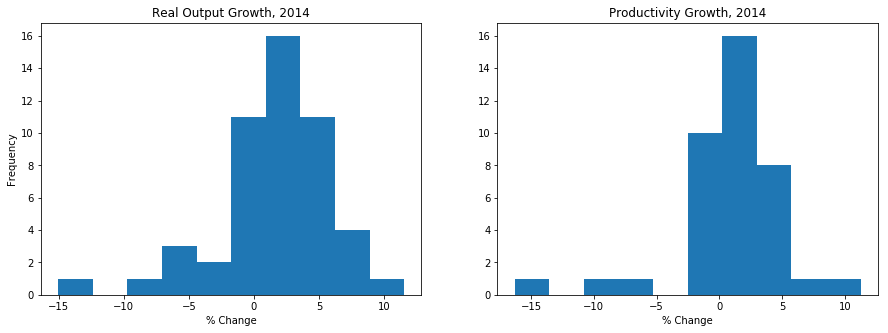

Countries included: ['China' 'United States' 'India' 'Japan' 'Germany' 'Russian Federation'
 'Brazil' 'France' 'United Kingdom' 'Indonesia' 'Italy' 'Mexico'
 'Republic of Korea' 'Canada' 'Turkey' 'Spain' 'Saudi Arabia'
 'Iran (Islamic Republic of)' 'Australia' 'Nigeria' 'Taiwan' 'Egypt'
 'Poland' 'Thailand' 'Pakistan' 'Argentina' 'Netherlands' 'Philippines'
 'South Africa' 'Malaysia' 'United Arab Emirates' 'Colombia' 'Switzerland'
 'Algeria' 'Viet Nam' 'Venezuela (Bolivarian Republic of)' 'Bangladesh'
 'Ukraine' 'Belgium' 'Iraq' 'Sweden' 'Kazakhstan' 'Norway' 'Romania'
 'Austria' 'Chile' 'Singapore' 'Peru' 'Qatar' 'China, Hong Kong SAR']


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file = 'pwt90.xlsx' # could also use 'https://www.rug.nl/ggdc/docs/pwt90.xlsx' 

pwt9 = pd.read_excel(file, sheetname=None)  # use None to return all sheets

# index data by country and year
pwt9['Data'].set_index(['country', 'year'], inplace = True)  

# growth rates:
# output
g_y = 100*pwt9['Data']['rgdpo'].pct_change().loc[:,2014]
# productivity
tot_hrs = pwt9['Data']['avh']*pwt9['Data']['emp']
prod = pwt9['Data']['rgdpo'] / tot_hrs
g_p = 100*prod.pct_change().loc[:,2014]

# largest economies 
big = pwt9['Data']['rgdpo'].loc[:,2014].sort_values(ascending=False).index[:50]

# histograms
def twin_histograms(data0, data1, incl):
    fig, ax = plt.subplots(1,2, figsize=(15,5))

    ax[0].hist(data0)
    ax[0].set_title('Real Output Growth, 2014')
    ax[0].set_ylabel('Frequency')
    ax[0].set_xlabel('% Change')

    ax[1].hist(data1)
    ax[1].set_title('Productivity Growth, 2014')
    ax[1].set_xlabel('% Change')

    plt.show()

    print('Countries included: '+str(incl))
    
twin_histograms(g_y[big], g_p[big].dropna(), big.values)

This completes our tour of (mostly US) data on Kaldor's stylized facts. Now, let's take a look at a model capturing these observations.

## Neoclassical Growth Model

The neoclassical growth model is a workhorse tool in macroeconomics. 

The remainder of the notebook uses an implementation of the neoclassical model written in Python, available on github: [neoclassical.py](). Please have a look at the accompanying notebook for an quick introduction to using the implementation: []().

To get started, let's get an instance of the model, solve it, and run a simulation.

Wall time: 5.56 s


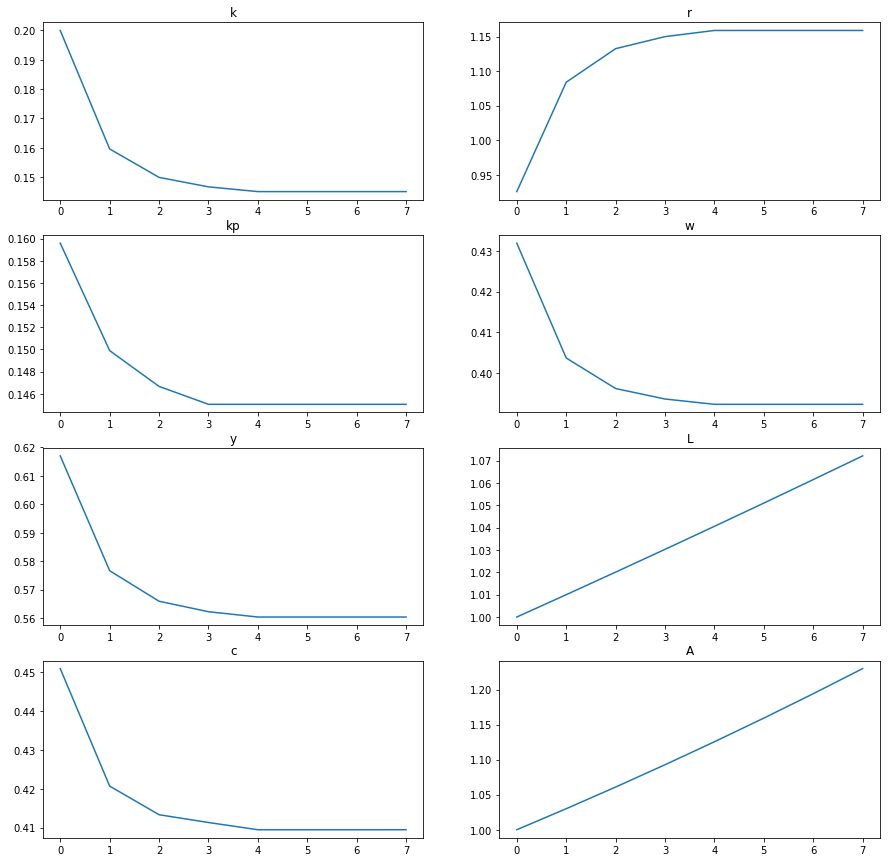

In [2]:
from neoclassical import NCG

mod = NCG()

%time mod.vfi()

sim = mod.simulate(mod.gridk[-1])


### Constant Income Shares

From a modeling perspective, this stylized fact is found in any model with Cobb-Douglas production and factor prices equal to marginal productivity

$ Y = F(K,L) = AK^\alpha L^{1-\alpha} \\
  wL = F_L L = (1-\alpha) AK^\alpha L^{1-\alpha} \\
  wL/Y = 1-\alpha
$

The parameter $\alpha$ is often cailbrated around 0.33 for models of the US. 

The version of the neoclassical model that we're considering here indeed features this type of production function. To show the stylized fact numerically, let's plot the income share of capital, and compare it to the model parameter $\alpha$ on the production function.

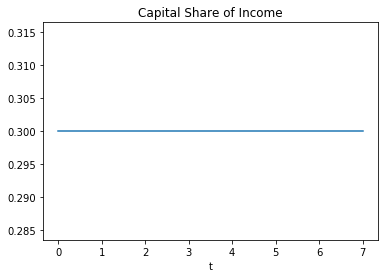

In [3]:
import matplotlib.pyplot as plt

# recover totals from per-effective-worker values
Y = sim['y']*sim['A']*sim['L']  
K = sim['k']*sim['A']*sim['L']  

# calculate capital income over total income
cap_share = sim['r']*K / Y

# graph
fig, ax = plt.subplots()
ax.plot(cap_share)
ax.set_xlabel('t')
ax.set_title('Capital Share of Income')
plt.show()

In [4]:
print('Cobb-Douglas parameter: ' + str(mod.params['alpha']) )

Cobb-Douglas parameter: 0.3


### Constant Growth in Income and Capital per Worker

By taking a look at the steady state equilibrium, we can see that the neoclassical model achieves this stylized fact. 

First, by the stability property, we know that regardless of intial conditions the model will reach the steady state.

Second, by definition of the steady state, we have for sufficiently large $t$ that

$ y_{t+1} = y_t \\
  k_{t+1} = k_t
$

In other words, there is no growth in $y$ or $k$. Now, recalling the definitions $y = Y/AL$ and $k = K/AL$, observe that

$ Y_{t+1}/L_{t+1} = (1+g) Y_{t}/L_{t} \\
  K_{t+1}/L_{t+1} = (1+g) K_{t}/L_{t} 
$

This shows that the steady state equilibrium features constant growth in income and capital per worker, driven by technological growth. Let's plot these quantities to show this numerically.

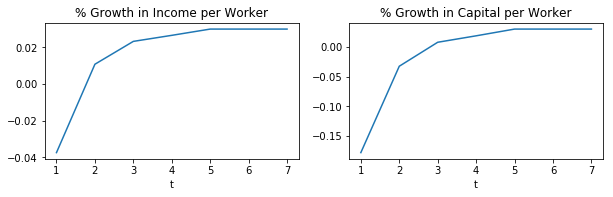

In [5]:
# % growth in Y/L and K/L
pct_growth = [(x/sim['L']).pct_change() for x in [Y, K]]

fig, ax = plt.subplots(1,2, figsize=(10,2.5))

ax[0].plot(pct_growth[0])
ax[0].set_title('% Growth in Income per Worker')
ax[0].set_xlabel('t')

ax[1].plot(pct_growth[1])
ax[1].set_title('% Growth in Capital per Worker')
ax[1].set_xlabel('t')

plt.show()

As shown, at the far end of the steady state equilibrium, growth in income and capital per worker flattens to a fixed rate. Let's make sure that this fixed rate is the parameter $g$, which is the growth rate of technology.

In [6]:
print('Growth rate of Y/L: '+str(pct_growth[0].iloc[-1]))
print('Growth rate of K/L: '+str(pct_growth[1].iloc[-1]))
print('Model parameter g:  '+str(mod.params['g']))

Growth rate of Y/L: 0.03
Growth rate of K/L: 0.03
Model parameter g:  0.03


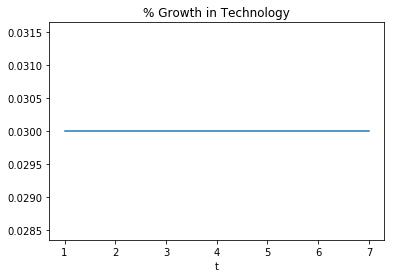

In [7]:
fig, ax = plt.subplots()
ax.plot(sim['A'].pct_change())
ax.set_title('% Growth in Technology')
ax.set_xlabel('t')
plt.show()

### Constant Capital-to-Income Ratio

Dividing the LHS and RHS of the above two equations demonstrates this result in the neoclassical model. The $L$ and $(1+g)$ terms cancel out, leaving

$K_{t+1}/Y_{t+1} = K_t/Y_t$

The following graph shows this result numerically.

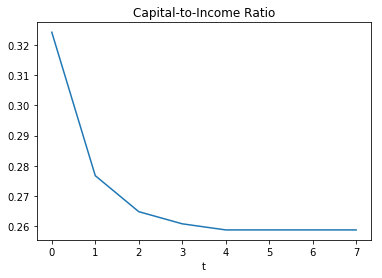

In [8]:
fig, ax = plt.subplots()
ax.plot(K/Y)
ax.set_title('Capital-to-Income Ratio')
ax.set_xlabel('t')
plt.show()

### Constant Rate of Return on Investment



In equilibrium the rate of return on investment, $r$, is a function of $k$. So in steady state, this quantity is constant in time:

$r_{t+1}/r_t = f'(k_{t+1})/f'(k_t) \\
\qquad{} = f'(k^*)/f'(k^*) \\
\qquad{} = 1
$

The graphs above showing prices and quantities show this result numerically.

### Variations in Growth Rates Among Countries

The final of Kaldor's stylized facts are that substaintial differences exist between countries in the growth rates of output and productivity. Let's first look at these rates by hand. For sufficiently large $t$,

$Y_t = y^* A_t L_t \\
\quad{} = f(k^*) (1+g)^t (1+n)^t  \\
Y_{t+1}/Y_t = (1+g)(1+n) \\
(Y_{t+1}/L_{t+1})/(Y_t/L_t) = (1+g) \\
$

      

So, the growth rate in output equals $(1+g)(1+n)$, and the growth rate in productivity equals $1+g$ (in the present model, households supply labor inelastically). 

As a result, distinct economies with different growth rates can exist if they have appropriately different parameters $g$ and $n$. The following code block recovers the histograms shown above by calibrating model parameters to match the PWT data.

In [10]:
g = g_p[big]/100
n = (g_y[big]/100 + 1) / (1+g) - 1

%time mods = [NCG(params={'g':g[country], 'n':n[country]}) for country in n.dropna().index]

%time [mod.vfi() for mod in mods]

%time sims = [mod.simulate(mod.gridk[0], plots=False) for mod in mods]



Wall time: 5.01 ms
Wall time: 4min 8s
Wall time: 705 ms


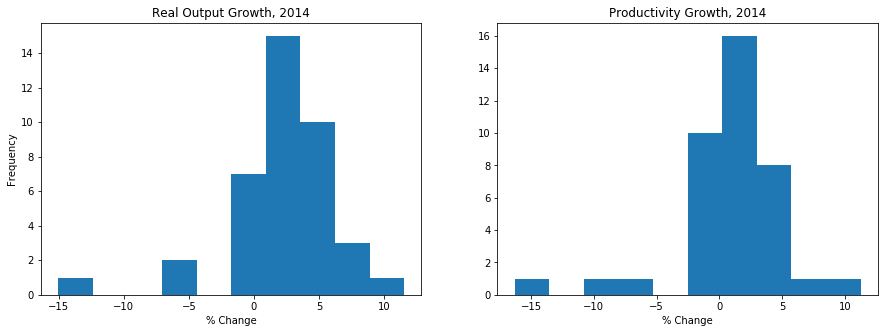

Countries included: ['United States', 'India', 'Japan', 'Germany', 'Russian Federation', 'Brazil', 'France', 'United Kingdom', 'Indonesia', 'Italy', 'Mexico', 'Republic of Korea', 'Canada', 'Turkey', 'Spain', 'Australia', 'Taiwan', 'Poland', 'Thailand', 'Pakistan', 'Argentina', 'Netherlands', 'Philippines', 'South Africa', 'Malaysia', 'Colombia', 'Switzerland', 'Viet Nam', 'Venezuela (Bolivarian Republic of)', 'Bangladesh', 'Belgium', 'Sweden', 'Norway', 'Romania', 'Austria', 'Chile', 'Singapore', 'Peru', 'China, Hong Kong SAR']


In [12]:
g_y_model = np.array([100*(s['y']*s['A']*s['L']).pct_change().iloc[-1] for s in sims])
g_p_model = np.array([100*(s['y']*s['A']).pct_change().iloc[-1] for s in sims])
twin_histograms(g_y_model, g_p_model, list(n.dropna().index))

This example is contrived, but demonstrates that the model indeed allows for cross-country differences in growth rates.

## Remarks

To recap, we've taken a quick look at Kaldor's Facts, and shown how a basic model captures them. Current data on the stylized facts were sourced from FRED and the Penn World Tables, two convenient repositories of macro and financial data. A simple neoclassical growth model provides an accessible tool for systematically thinking about an economy that exhibits these stylized facts. 

Thanks for reading!

